## Preprocessing the Data

In [2]:
!pip install transformers
!pip install emoji
!pip install contractions

     |████████████████████████████████| 2.3MB 4.0MB/s 
     |████████████████████████████████| 3.3MB 28.6MB/s 
     |████████████████████████████████| 901kB 30.2MB/s 
     |████████████████████████████████| 133kB 3.8MB/s 
     |████████████████████████████████| 286kB 2.9MB/s 
     |████████████████████████████████| 327kB 4.9MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85403 sha256=ce8e55be4fa2962de2263859d6c0bf40fecd1df1055194adaf34591b406ed8ee
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick


In [3]:
# Data manipulation libraries
import pandas as pd
import numpy as np
import json
from pprint import pprint

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Text processing libraries
import emoji
import re
import contractions
from collections import Counter
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [41]:
data = pd.read_csv('/content/drive/MyDrive/YBIGTA/2021-1 컨퍼런스(감성타이포)/result.csv')
data

,text,anger,disgust,fear,joy,sadness,surprise,no emotion
0,The kitchen stinks .,0,1,0,0,0,0,0
1,I'll throw out the garbage .,0,0,0,0,0,0,1
2,"So Dick , how about getting some coffee for to...",0,0,0,1,0,0,0
3,Coffee ? I don ’ t honestly like that kind of ...,0,1,0,0,0,0,0
4,"Come on , you can at least try a little , besi...",0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
226189,NaN,0,0,0,0,0,0,1
226190,Happy Mothers Day All my love,0,0,0,1,0,0,0
226191,Happy Mother's Day to all the mommies out ther...,0,0,0,1,0,0,0
226192,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY N...,0,0,0,1,0,0,0


In [42]:
data.dropna(inplace = True)

In [43]:
X = data['text']
y = data.loc[:,'anger':].values.astype(float)
y_ = data.loc[:,'anger':]
y_

,anger,disgust,fear,joy,sadness,surprise,no emotion
0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
226188,0,0,0,1,0,0,0
226190,0,0,0,1,0,0,0
226191,0,0,0,1,0,0,0
226192,0,0,0,1,0,0,0


In [44]:
data['Cardinality'] = data.loc[:,'anger':].apply(lambda x: sum(x), axis=1)
display(data.head())

,text,anger,disgust,fear,joy,sadness,surprise,no emotion,Cardinality
0,The kitchen stinks .,0,1,0,0,0,0,0,1
1,I'll throw out the garbage .,0,0,0,0,0,0,1,1
2,"So Dick , how about getting some coffee for to...",0,0,0,1,0,0,0,1
3,Coffee ? I don ’ t honestly like that kind of ...,0,1,0,0,0,0,0,1
4,"Come on , you can at least try a little , besi...",0,0,0,0,0,0,1,1


In [45]:
data['Cardinality'].value_counts()

1    221174
2      4829
3       121
Name: Cardinality, dtype: int64

In [46]:
data[data['Cardinality'] == 3 ]

,text,anger,disgust,fear,joy,sadness,surprise,no emotion,Cardinality
144647,that was an incredibly dumb thing to do name i...,1,1,0,0,1,0,0,3
145776,it is not unlikely that his family was already...,1,0,0,0,1,0,1,3
145880,dumb question what is a gilding train ?,1,0,0,0,0,1,1,3
145930,she is the fucking worst p you are not fat you...,1,1,0,0,1,0,0,3
146448,it is so ugly i felt personally attacked by it...,1,1,0,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...
194697,i owe nothing and they take more than that eve...,1,0,0,0,1,1,0,3
195543,never made it through it makes me physically i...,0,1,1,0,1,0,0,3
196323,deep blue eyes look weird to me the rest seems...,0,1,1,1,0,0,0,3
196948,bless this woman that honestly sounds horrific...,0,1,1,1,0,0,0,3


In [47]:
# Computing number of samples per emotion
data = data.drop('Cardinality', axis = 1)
classes_count = data.loc[:,'anger':].sum(axis=0).sort_values(ascending=False)

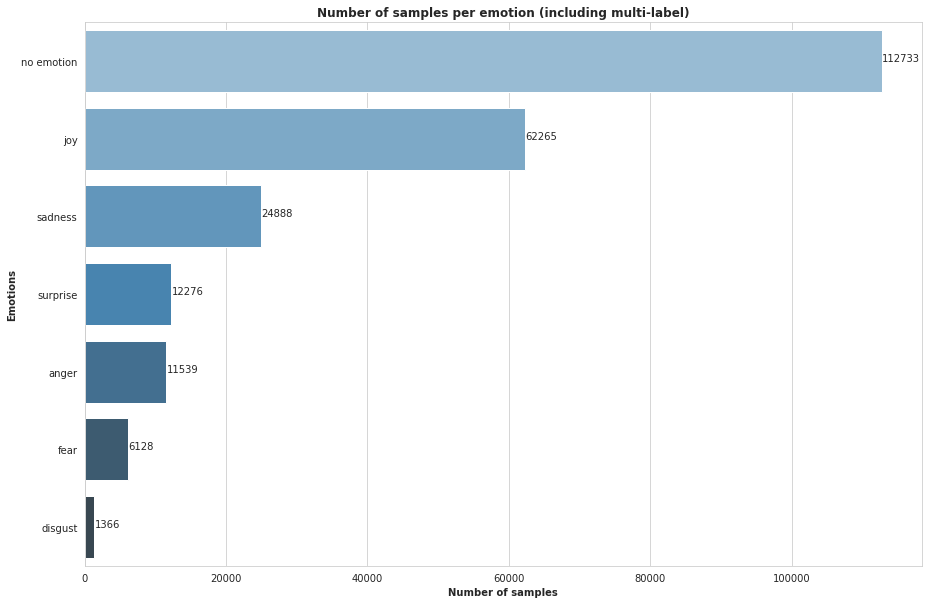

In [48]:
# Visualizing the number of samples per classes
plt.figure(figsize=(15,10))
ax = sns.barplot(x=classes_count.values, y=classes_count.index, orient='h', palette="Blues_d")

for p in ax.patches:
  value = int(p.get_width())
  x = p.get_x() + p.get_width() + 30
  y = p.get_y() + p.get_height()/2
  ax.annotate(value, (x, y))

plt.title("Number of samples per emotion (including multi-label)", fontweight='bold')
plt.ylabel("Emotions", fontweight='bold')
plt.xlabel("Number of samples", fontweight='bold')
plt.show()

In [49]:
data['encoding'] = data['anger']

In [50]:
def encoding(df): #i번째 줄에 해당됨
    if df['disgust'] == 1:
        return 0
    elif df['fear'] == 1:
        return 1
    elif df['surprise'] == 1:
        return 2
    elif df['anger'] == 1:
        return 3
    elif df['sadness'] == 1:
        return 4
    elif df['joy'] == 1:
        return 5
    else:
        return 6

In [51]:
for i in range(len(data)):
    data['encoding'].iloc[i] = encoding(data.iloc[i])

data['encoding']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


0         0
1         6
2         5
3         0
4         6
         ..
226188    5
226190    5
226191    5
226192    5
226193    5
Name: encoding, Length: 226124, dtype: int64

In [52]:
data

,text,anger,disgust,fear,joy,sadness,surprise,no emotion,encoding
0,The kitchen stinks .,0,1,0,0,0,0,0,0
1,I'll throw out the garbage .,0,0,0,0,0,0,1,6
2,"So Dick , how about getting some coffee for to...",0,0,0,1,0,0,0,5
3,Coffee ? I don ’ t honestly like that kind of ...,0,1,0,0,0,0,0,0
4,"Come on , you can at least try a little , besi...",0,0,0,0,0,0,1,6
...,...,...,...,...,...,...,...,...,...
226188,Succesfully following Tayla!!,0,0,0,1,0,0,0,5
226190,Happy Mothers Day All my love,0,0,0,1,0,0,0,5
226191,Happy Mother's Day to all the mommies out ther...,0,0,0,1,0,0,0,5
226192,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY N...,0,0,0,1,0,0,0,5


In [53]:
data[data['encoding'] == 6]

,text,anger,disgust,fear,joy,sadness,surprise,no emotion,encoding
1,I'll throw out the garbage .,0,0,0,0,0,0,1,6
4,"Come on , you can at least try a little , besi...",0,0,0,0,0,0,1,6
6,"Not for me , Dick .",0,0,0,0,0,0,1,6
7,Are things still going badly with your housegu...,0,0,0,0,0,0,1,6
9,"Leo , I really think you ’ re beating around t...",0,0,0,0,0,0,1,6
...,...,...,...,...,...,...,...,...,...
226177,"not really just leaving flat now, on the looko...",0,0,0,0,0,0,1,6
226184,I think the lesson of the day is not to have l...,0,0,0,0,0,0,1,6
226185,can you give me the link for the kimba diaries...,0,0,0,0,0,0,1,6
226186,Ooo showing of your French skills!! lol Things...,0,0,0,0,0,0,1,6


In [54]:
no_emo_idx = data[data['encoding'] == 6].index.values
no_emo_idx

array([     1,      4,      6, ..., 226185, 226186, 226187])

In [55]:
no_emo_drop = np.random.choice(no_emo_idx, 90982, replace = False)
no_emo_drop

array([  8005,  10696,  64624, ..., 220879,  63208,  82329])

In [56]:
data_ = data.drop(no_emo_drop)

In [57]:
data_['encoding'].value_counts()

5    60295
4    23981
6    20000
2    12196
3    11195
1     6109
0     1366
Name: encoding, dtype: int64

In [58]:
X = data_['text']
y = data_.loc[:,'anger':]

In [59]:
y

,anger,disgust,fear,joy,sadness,surprise,no emotion,encoding
0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,5
3,0,1,0,0,0,0,0,0
5,1,0,0,0,0,0,0,3
8,1,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...
226188,0,0,0,1,0,0,0,5
226190,0,0,0,1,0,0,0,5
226191,0,0,0,1,0,0,0,5
226192,0,0,0,1,0,0,0,5


In [60]:
# returns X_train, X_test, y_train, y_test dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify= y['encoding'], random_state=17)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, shuffle=True, stratify= y_test['encoding'], random_state=17)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('X_val shape:', X_val.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
print('y_val shape:', y_val.shape)

X_train shape: (108113,)
X_test shape: (13514,)
X_val shape: (13515,)
y_train shape: (108113, 8)
y_test shape: (13514, 8)
y_val shape: (13515, 8)


In [61]:
y_train.drop(['encoding'],axis = 1, inplace = True)
y_test.drop(['encoding'],axis = 1, inplace = True)
y_val.drop(['encoding'],axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [62]:
size_train = y_train.shape[0]
size_val = y_val.shape[0]
size_test = y_test.shape[0]

# Defining the total number of samples
size_all = size_train + size_val + size_test

In [63]:
# Defining classes representation for each dataset (GoEmotions)

train_count_GE = (y_train.loc[:,'anger':].sum(axis=0) / size_train)*100
val_count_GE = (y_val.loc[:,'anger':].sum(axis=0) / size_val)*100
test_count_GE = (y_test.loc[:,'anger':].sum(axis=0) / size_test)*100

# Constructing a unique dataset for visualization purposes
balance_GE = pd.DataFrame(data=[train_count_GE, val_count_GE, test_count_GE]).T.reset_index(drop=False)
balance_GE.columns = ['Emotion', 'Train', 'Validation', 'Test']
balance_GE = balance_GE.sort_values('Train', ascending=False)
balance_GE = balance_GE.melt(id_vars='Emotion', var_name='Dataset', value_vars=['Train','Validation', 'Test'], value_name='Percentage')

# Preview of data
display(balance_GE.head())

,Emotion,Dataset,Percentage
0,joy,Train,46.087890
1,sadness,Train,18.394643
2,no emotion,Train,16.093347
3,surprise,Train,9.083089
4,anger,Train,8.544763


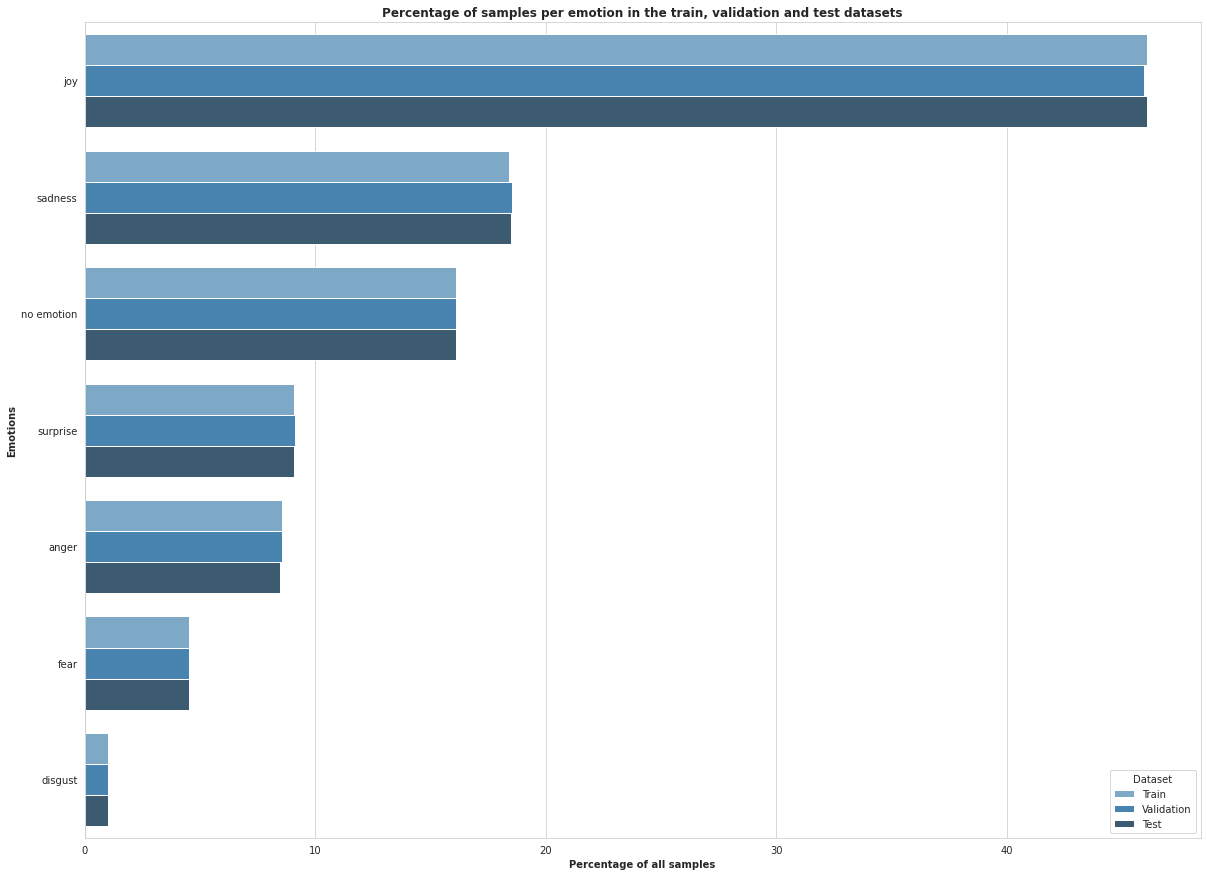

In [64]:
# Classe Balance visualization on GoEmotions
plt.figure(figsize=(20,15))
sns.barplot(x='Percentage', y='Emotion', data=balance_GE, orient='h', hue='Dataset', palette="Blues_d")
plt.title("Percentage of samples per emotion in the train, validation and test datasets", fontweight='bold')
plt.ylabel("Emotions", fontweight='bold')
plt.xlabel("Percentage of all samples", fontweight='bold')
plt.show()

In [66]:
# print('X_train shape:', X_train.shape)
# print('X_test shape:', X_test.shape)
# print('X_val shape:', X_val.shape)
# print('y_train shape:', y_train.shape)
# print('y_test shape:', y_test.shape)
# print('y_val shape:', y_val.shape)
X_train = pd.DataFrame(X_train)
train_data = X_train.join(y_train)
train_data.to_csv('/content/drive/MyDrive/YBIGTA/2021-1 컨퍼런스(감성타이포)/train_bert.csv')

X_test = pd.DataFrame(X_test)
test_data = X_test.join(y_test)
test_data.to_csv('/content/drive/MyDrive/YBIGTA/2021-1 컨퍼런스(감성타이포)/test_bert.csv')

X_val = pd.DataFrame(X_val)
val_data = X_val.join(y_val)
val_data.to_csv('/content/drive/MyDrive/YBIGTA/2021-1 컨퍼런스(감성타이포)/val_bert.csv')

In [68]:
data_.to_csv('/content/drive/MyDrive/YBIGTA/2021-1 컨퍼런스(감성타이포)/data_new.csv')